In [1]:
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPClassifier

import pandas as pd
import shap
import xgboost


#USer files
import xgbStack
import load_data


d:\Github Repos\CSCI 571\HW2\env2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Hello


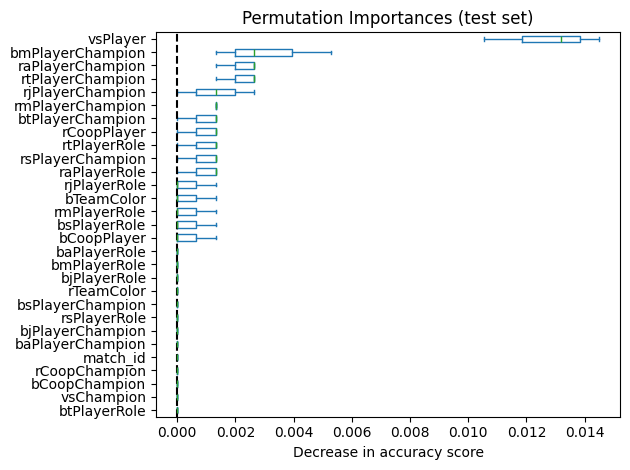

In [2]:


x_train, x_test, y_train, y_test, x_combined_df, y_combined_df = load_data.load_matchdata_into_df("original")
 
xgbStack_instance = xgbStack.xgbStack()
meta_model = xgbStack_instance.returnModel()

meta_model.fit(x_train, y_train)

result = permutation_importance(meta_model, x_test, y_test, n_repeats=3, random_state=42)
importances = result.importances_mean

print("Hello")

sorted_importances_idx = result.importances_mean.argsort()

importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=x_train.columns[sorted_importances_idx],
)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

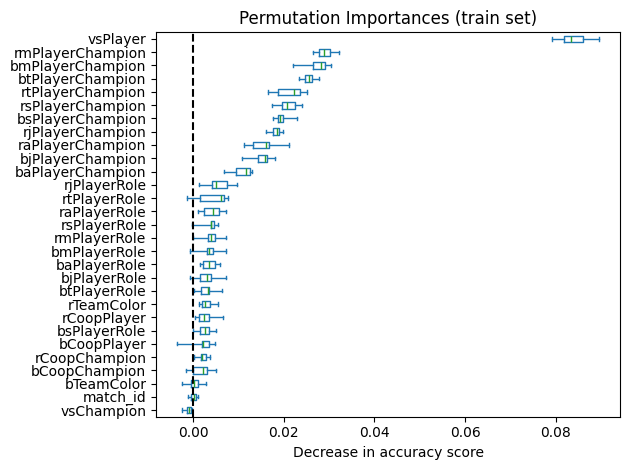

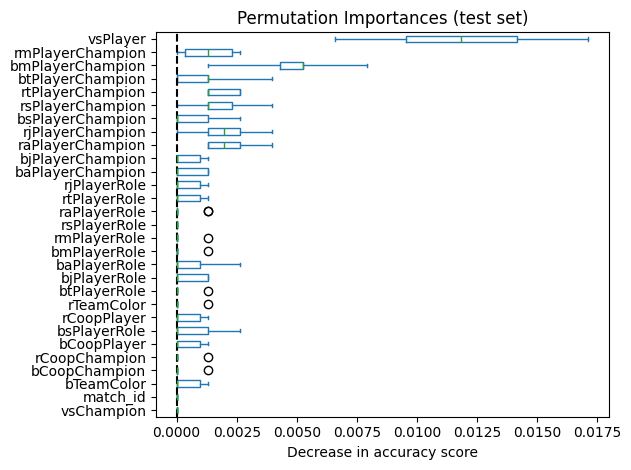

In [3]:
train_result = permutation_importance(
    meta_model, x_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
test_results = permutation_importance(
    meta_model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = train_result.importances_mean.argsort()

train_importances = pd.DataFrame(
    train_result.importances[sorted_importances_idx].T,
    columns=x_train.columns[sorted_importances_idx],
)
test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=x_train.columns[sorted_importances_idx],
)

for name, importances in zip(["train", "test"], [train_importances, test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

In [4]:
shap.initjs()


